**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score,confusion_matrix

**Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Disaster Tweets(Email Spam)/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**Data Analysis**

In [ ]:
df.shape

(7613, 5)

In [ ]:
df.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


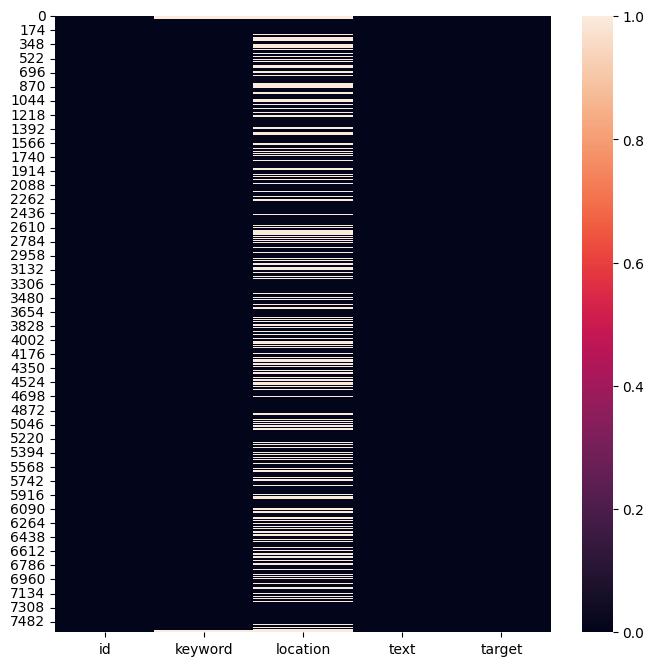

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())
plt.show()

<ipython-input-6-33e2cf30d18f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df,palette='deep')


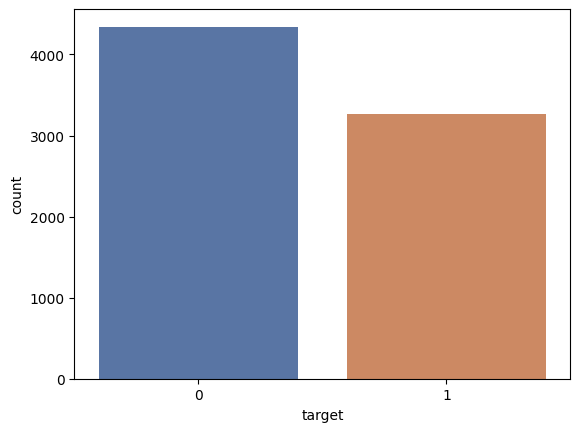

In [ ]:
sns.countplot(x='target',data=df,palette='deep')
plt.show()

**Splitting Data for Training and Testing**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['target'],stratify=df['target'],test_size=0.15,random_state=40)

In [ ]:
print(x_train.shape,x_test.shape)

(6471,) (1142,)


**Model Building and Training**

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name,num_labels=2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model

In [ ]:
x_train=list(x_train)
y_train=y_train.to_numpy()

In [ ]:
max_length = 50
train_encodings = tokenizer(x_train, truncation=True, padding=True, max_length=max_length,return_tensors='tf')

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).shuffle(100).batch(32)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
model.fit(train_dataset, epochs=15)

Epoch 1/15
203/203 [==============================] - 115s 322ms/step - loss: 0.4435 - accuracy: 0.8082
Epoch 2/15
203/203 [==============================] - 65s 322ms/step - loss: 0.3300 - accuracy: 0.8734
Epoch 3/15
203/203 [==============================] - 66s 325ms/step - loss: 0.2527 - accuracy: 0.9093
Epoch 4/15
203/203 [==============================] - 65s 322ms/step - loss: 0.1906 - accuracy: 0.9368
Epoch 5/15
203/203 [==============================] - 65s 322ms/step - loss: 0.1464 - accuracy: 0.9509
Epoch 6/15
203/203 [==============================] - 66s 324ms/step - loss: 0.1239 - accuracy: 0.9556
Epoch 7/15
203/203 [==============================] - 66s 323ms/step - loss: 0.0912 - accuracy: 0.9668
Epoch 8/15
203/203 [==============================] - 66s 323ms/step - loss: 0.0752 - accuracy: 0.9709
Epoch 9/15
203/203 [==============================] - 65s 323ms/step - loss: 0.0696 - accuracy: 0.9747
Epoch 10/15
203/203 [==============================] - 66s 323ms/step - 

**Test Data**

In [ ]:
model.save_pretrained('/content/drive/MyDrive/Disaster Tweets(Email Spam)/Saved Model')
tokenizer.save_pretrained('/content/drive/MyDrive/Disaster Tweets(Email Spam)/Saved Model')


('/content/drive/MyDrive/Disaster Tweets(Email Spam)/Saved Model/tokenizer_config.json',
 '/content/drive/MyDrive/Disaster Tweets(Email Spam)/Saved Model/special_tokens_map.json',
 '/content/drive/MyDrive/Disaster Tweets(Email Spam)/Saved Model/vocab.txt',
 '/content/drive/MyDrive/Disaster Tweets(Email Spam)/Saved Model/added_tokens.json')

In [ ]:
tt_en=loaded_tokenizer(x_test, truncation=True, padding=True, max_length=max_length,return_tensors='tf')


In [ ]:
x_test=list(x_test)
test_encodings = tokenizer(x_test, truncation=True, padding=True, max_length=max_length,return_tensors='tf')

**Prediction**

In [ ]:
logits = model.predict(test_encodings)[0]
probabilities = tf.nn.softmax(logits, axis=-1)
predicted_label = tf.argmax(probabilities, axis=-1).numpy()

36/36 [==============================] - 9s 110ms/step


In [ ]:
print(accuracy_score(y_test,predicted_label))

0.8248686514886164


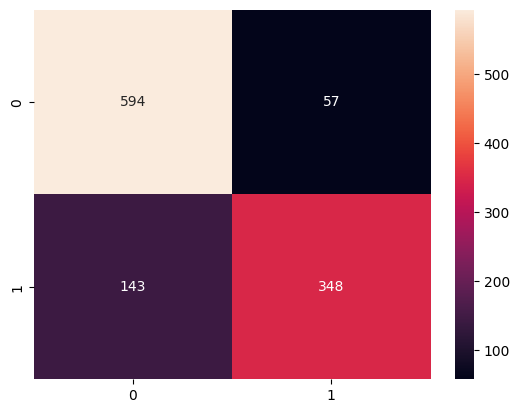

In [ ]:
sns.heatmap(confusion_matrix(y_test,predicted_label),annot=True,fmt='d')
plt.show()